In [1]:
# Imports
import numpy as np 
import pandas as pd 
import seaborn
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/apple-quality/apple_quality.csv


# Loading the data

In [2]:
path = "/kaggle/input/apple-quality/apple_quality.csv"
df = pd.read_csv(path)
df.head()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good

In [3]:
df.tail()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   
4000     NaN       NaN       NaN        NaN          NaN        NaN       NaN   

                                Acidity Quality  
3996                        1.854235285    good  
3997                       -1.334611391     bad  
3998                       -2.229719806    good  
3999                        1.599796456    good  
4000  Created_by_Nidula_Elgiriyewithana     NaN

In [4]:
df = df.dropna()

# Converting Acidity dtype object -> float
df["Acidity"] = df["Acidity"].astype("float64")

# Exploratory Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


In [6]:
df.describe().T

count         mean          std       min         25%  \
A_id         4000.0  1999.500000  1154.844867  0.000000  999.750000   
Size         4000.0    -0.503015     1.928059 -7.151703   -1.816765   
Weight       4000.0    -0.989547     1.602507 -7.149848   -2.011770   
Sweetness    4000.0    -0.470479     1.943441 -6.894485   -1.738425   
Crunchiness  4000.0     0.985478     1.402757 -6.055058    0.062764   
Juiciness    4000.0     0.512118     1.930286 -5.961897   -0.801286   
Ripeness     4000.0     0.498277     1.874427 -5.864599   -0.771677   
Acidity      4000.0     0.076877     2.110270 -7.010538   -1.377424   

                     50%          75%          max  
A_id         1999.500000  2999.250000  3999.000000  
Size           -0.513703     0.805526     6.406367  
Weight         -0.984736     0.030976     5.790714  
Sweetness      -0.504758     0.801922     6.374916  
Crunchiness     0.998249     1.894234     7.619852  
Juiciness       0.534219     1.835976     7.364403  
Ripeness        0.503445     1.766212     7.237837  
Acidity         0.022609     1.510493     7.404736

## Distributions

array([[<Axes: title={'center': 'A_id'}>,
        <Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Sweetness'}>,
        <Axes: title={'center': 'Crunchiness'}>,
        <Axes: title={'center': 'Juiciness'}>],
       [<Axes: title={'center': 'Ripeness'}>,
        <Axes: title={'center': 'Acidity'}>, <Axes: >]], dtype=object)

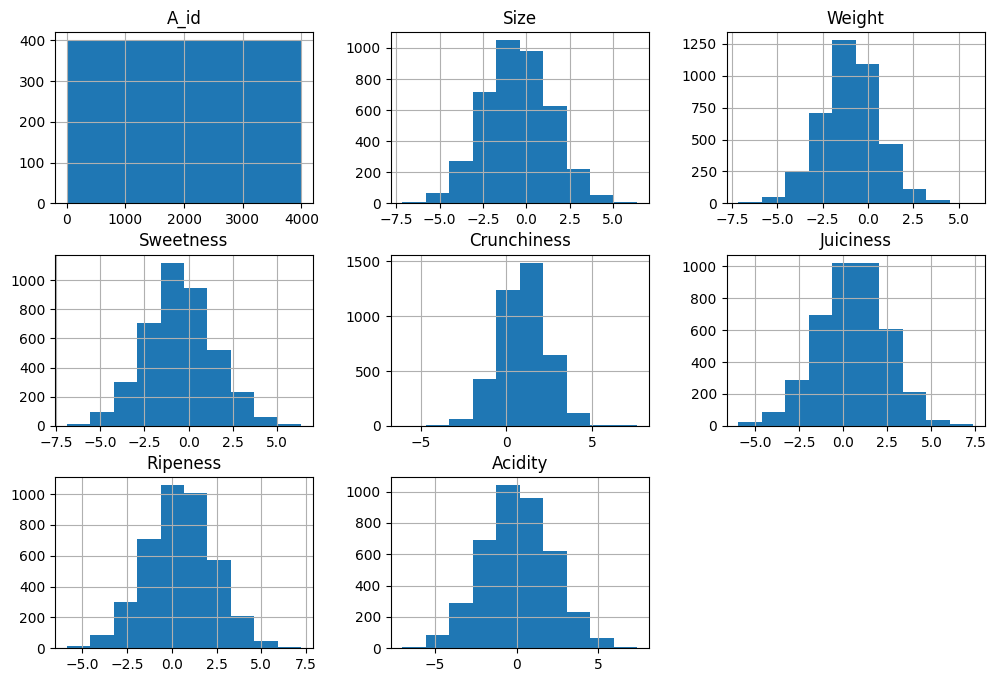

In [7]:
df.hist(figsize=(12,8))

<Axes: xlabel='Quality', ylabel='count'>

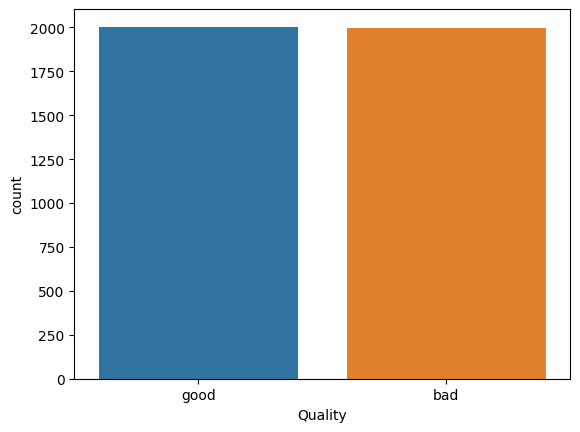

In [8]:
seaborn.countplot(data=df, x="Quality",)

Quality is evenly distrubuted.

In [9]:
# Making a copy of df and deleting a_id for observation 
shadow = df.copy()
shadow = shadow.drop(['A_id'], axis=1)

<Axes: >

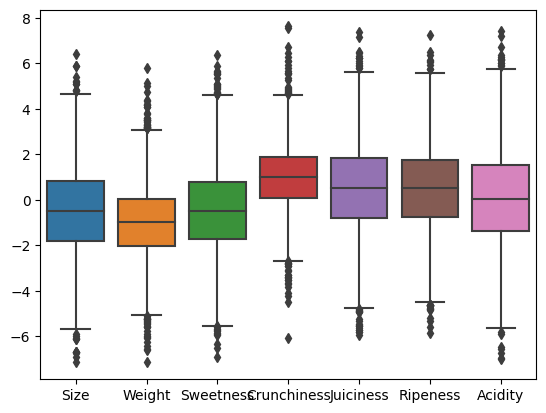

In [10]:
seaborn.boxplot(data=shadow)

## Missing Data Handling

In [11]:
df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [12]:
df.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

# Data Preparation

## Correlation Matrix

In [13]:
shadow = shadow.drop(['Quality'], axis = 1)
corr_matrix = shadow.corr()

<Axes: >

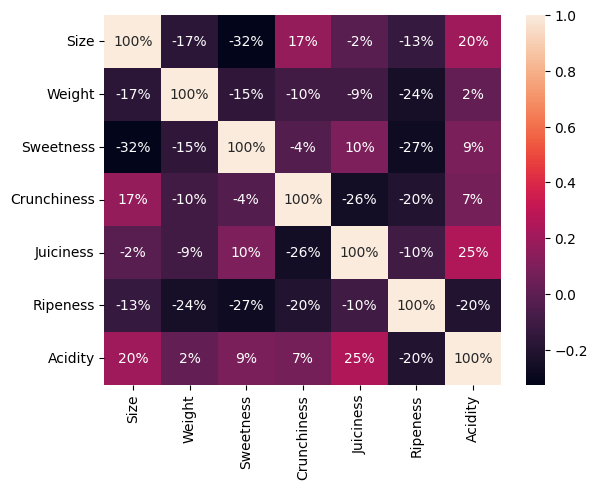

In [14]:
# Heatmap
seaborn.heatmap(corr_matrix, annot = True, fmt=".0%")

<Axes: >

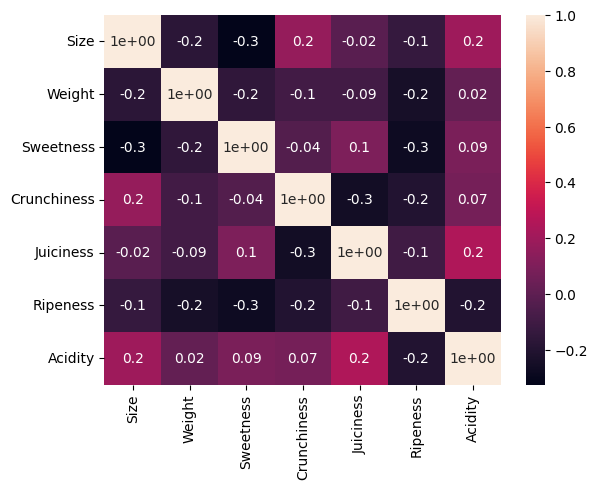

In [15]:
seaborn.heatmap(corr_matrix, annot = True, fmt=".000")

## Profiling

In [16]:
ProfileReport(shadow)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Preparation for Acidity Level Regression

In [17]:
features = df.drop(['A_id','Quality'], axis=1)
label = df['Quality']

In [18]:
ftrain, ftest, ltrain, ltest = train_test_split(features, label, test_size=0.2, random_state=0)

In [19]:
# Models
LR = LogisticRegression()
CT = DecisionTreeClassifier()

In [20]:
# Training 
LR.fit(ftrain, ltrain)
CT.fit(ftrain, ltrain)

DecisionTreeClassifier()

In [21]:
# Predictions
lrpred = LR.predict(ftest)
ctpred = CT.predict(ftest)

In [22]:
# Evaluation
print(f"Model - LR, Accuracy - {accuracy_score(ltest, lrpred)}")
print(f"Model - CT, Accuracy - {accuracy_score(ltest, ctpred)}")

Model - LR, Accuracy - 0.7525
Model - CT, Accuracy - 0.77125


In [23]:
# Classification Matrix
print(f"LR\n{'=' * 65}")
print(f"{classification_report(ltest, lrpred)}")
print(f"CT\n{'=' * 65}")
print(f"{classification_report(ltest, ctpred)}")

LR
              precision    recall  f1-score   support

         bad       0.78      0.73      0.76       422
        good       0.72      0.77      0.75       378

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800

CT
              precision    recall  f1-score   support

         bad       0.79      0.77      0.78       422
        good       0.75      0.78      0.76       378

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800



<Axes: >

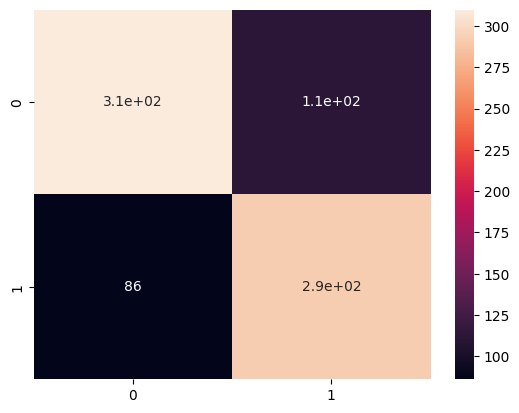

In [24]:
# Confusion Matrix
seaborn.heatmap(confusion_matrix(ltest, lrpred), annot=True)

<Axes: >

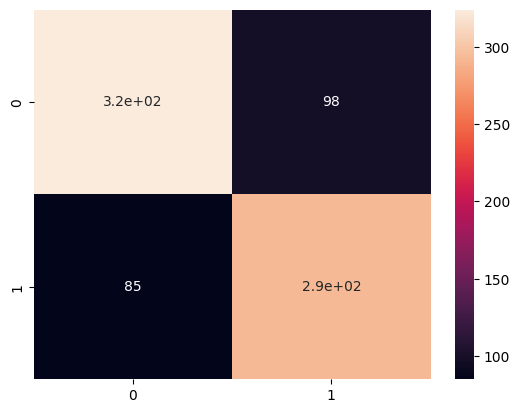

In [25]:
seaborn.heatmap(confusion_matrix(ltest, ctpred), annot=True)

# Without Outliers